<a href="https://colab.research.google.com/github/pankaj18/NLP-Projects/blob/master/veer_zaara_songs_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [37]:
!wget https://github.com/pankaj18/NLP-Projects/blob/master/veer_zaara.txt

--2020-07-10 16:03:50--  https://github.com/pankaj18/NLP-Projects/blob/master/veer_zaara.txt
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘veer_zaara.txt’

veer_zaara.txt          [ <=>                ] 203.42K  --.-KB/s    in 0.1s    

2020-07-10 16:03:51 (1.99 MB/s) - ‘veer_zaara.txt’ saved [208303]



In [38]:
ls

NLP-Projects/  sample_data/  veer_zaara.txt


In [39]:
f = open('veer_zaara.txt', mode='r', encoding='latin-1')
print(f.read())






<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
  <link rel="dns-prefetch" href="https://github.githubassets.com">
  <link rel="dns-prefetch" href="https://avatars0.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars1.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars2.githubusercontent.com">
  <link rel="dns-prefetch" href="https://avatars3.githubusercontent.com">
  <link rel="dns-prefetch" href="https://github-cloud.s3.amazonaws.com">
  <link rel="dns-prefetch" href="https://user-images.githubusercontent.com/">



  <link crossorigin="anonymous" media="all" integrity="sha512-/uy49LxdzjR0L36uT6CnmV1omP/8ZHxvOg4zq/dczzABHq9atntjJDmo5B7sV0J+AwVmv0fR0ZyW3EQawzdLFA==" rel="stylesheet" href="https://github.githubassets.com/assets/frameworks-feecb8f4bc5dce34742f7eae4fa0a799.css" />
  <link crossorigin="anonymous" media="all" integrity="sha512-0Dq+Bdp4xIEoUQ6d8RzDMUJdGejYZhWcZUh+JZDfYn/RCdp7u4QhKG8ABLNmvxL5YobdxQCLJaaacKNyI

In [9]:
!git clone https://github.com/pankaj18/NLP-Projects/
#data = open('/tmp/veer_zaara.txt').read()

Cloning into 'NLP-Projects'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [23]:
path='NLP-Projects/veer_zaara.txt'
with open(path, 'rb') as f:
  text = f.read()
text

b'Aa\x85. Aa\x85. Aa\x85. Aa\x85. Aa\x85. Aa.. Aa..\r\nJo bandishein thi\r\nZamaane ki tod aaya hoon\r\nMain tere vaaste duniya\r\nKo chhod aaya hoon\r\nAaya tere dar par deewana\r\nAaya tere dar par deewana\r\nAaya hoon aaya aaya tera deewana\r\nAaya tere dar par deewana\r\nAaya tere dar par deewana\r\nTera deewana tera\r\nDeewana tera deewana\r\nAaya tere dar par deewana\r\nAaya tere dar par deewana\r\nTera deewana tera\r\nTera deewana deewana\r\nTera deewana tera tera\r\nDeewana tera deewana tera\r\nDeewana tera deewana\r\nAaya tere dar par deewana\r\nAaya tere dar par deewana\r\nYe hai tera hi saudaayi\r\nYe hai tera hi shahdaayi\r\nYe hai tera hi saudaayi\r\nYe hai tera hi shahdaayi\r\nTere ishq mein hai isse mar jaana\r\nAaya tere dar par deewana\r\nAaya tere dar par deewana\r\nAa\x85. Aa\x85. Aa\x85\r\n\r\nTera jalwa jo paaun\r\nMain har gham bhool jaaun\r\nTera jalwa jo main paaun\r\nMain toh har gham bhool jaaun\r\nYe aansoo jo hai behte\r\nBas itna hai ye kehte\r\nKahaan tu a

In [24]:
text=text.encode('utf-8')

AttributeError: ignored

In [25]:
#f = open(path, "r")
f = open(path, mode='r', encoding='latin-1')
print(f.read())

Aa. Aa. Aa. Aa. Aa. Aa.. Aa..
Jo bandishein thi
Zamaane ki tod aaya hoon
Main tere vaaste duniya
Ko chhod aaya hoon
Aaya tere dar par deewana
Aaya tere dar par deewana
Aaya hoon aaya aaya tera deewana
Aaya tere dar par deewana
Aaya tere dar par deewana
Tera deewana tera
Deewana tera deewana
Aaya tere dar par deewana
Aaya tere dar par deewana
Tera deewana tera
Tera deewana deewana
Tera deewana tera tera
Deewana tera deewana tera
Deewana tera deewana
Aaya tere dar par deewana
Aaya tere dar par deewana
Ye hai tera hi saudaayi
Ye hai tera hi shahdaayi
Ye hai tera hi saudaayi
Ye hai tera hi shahdaayi
Tere ishq mein hai isse mar jaana
Aaya tere dar par deewana
Aaya tere dar par deewana
Aa. Aa. Aa

Tera jalwa jo paaun
Main har gham bhool jaaun
Tera jalwa jo main paaun
Main toh har gham bhool jaaun
Ye aansoo jo hai behte
Bas itna hai ye kehte
Kahaan tu aur kahaan
Main paraaya hoon yahaan main
Aa karam itna agar
Ho ki mujh par ik nazar ho
Karam itna agar ho ki
Mujh par ik nazar ho
Jaan

In [26]:
tokenizer = Tokenizer()

data =  open(path, mode='r', encoding='latin-1').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'hai': 1, 'ho': 2, 'tere': 3, 'haay': 4, 'mera': 5, 'ham': 6, 'ye': 7, 'hain': 8, 'main': 9, 'deewana': 10, 'tera': 11, 'yaha': 12, 'hun': 13, 'aaya': 14, 'des': 15, 'mein': 16, 'afsana': 17, 'ki': 18, 'toh': 19, 'aa': 20, 'tum': 21, 'ke': 22, 've': 23, 'pe': 24, 'na': 25, 'liye': 26, 'kahaan': 27, 'par': 28, 'aisa': 29, 'haan': 30, 'kyun': 31, 'dil': 32, 'kis': 33, 'koyi': 34, 'jo': 35, 'hi': 36, 'aur': 37, 'oy': 38, 'rahi': 39, 'dar': 40, 'har': 41, 'jaise': 42, 'mod': 43, 'aa\x85': 44, 'diye': 45, 'lo': 46, 'thi': 47, 'hoy': 48, 'the': 49, 'ik': 50, 'ab': 51, 'java': 52, 'bhi': 53, 'ka': 54, 'mere': 55, 'phir': 56, 'hoon': 57, 'ya': 58, 'bhai': 59, 'waise': 60, 'rahenge': 61, 'gaa': 62, 'gaye': 63, 'kaha': 64, 'kya': 65, 'ek': 66, 'gayi': 67, 'chal': 68, 'ko': 69, 'yun': 70, 'qurbaan': 71, 'diyaan': 72, 'se': 73, 'teri': 74, 'aaj': 75, 'do': 76, 'tha': 77, 'oh': 78, 'ha': 79, 'kaisi': 80, 'ni': 81, 'jaan': 82, 'sun': 83, 'jind': 84, 'chaahat': 85, 'pal': 86, 'zindagi': 87, 'tenu': 

In [27]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [28]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
68/68 [==============================] - 1s 13ms/step - loss: 5.7430 - accuracy: 0.0635
Epoch 2/100
68/68 [==============================] - 1s 14ms/step - loss: 3.9667 - accuracy: 0.3206
Epoch 3/100
68/68 [==============================] - 1s 13ms/step - loss: 2.7038 - accuracy: 0.4678
Epoch 4/100
68/68 [==============================] - 1s 13ms/step - loss: 1.7408 - accuracy: 0.6072
Epoch 5/100
68/68 [==============================] - 1s 13ms/step - loss: 1.0895 - accuracy: 0.7433
Epoch 6/100
68/68 [==============================] - 1s 13ms/step - loss: 0.7258 - accuracy: 0.8169
Epoch 7/100
68/68 [==============================] - 1s 13ms/step - loss: 0.5516 - accuracy: 0.8546
Epoch 8/100
68/68 [==============================] - 1s 13ms/step - loss: 0.4639 - accuracy: 0.8648
Epoch 9/100
68/68 [==============================] - 1s 13ms/step - loss: 0.4381 - accuracy: 0.8657
Epoch 10/100
68/68 [==============================] - 1s 13ms/step - loss: 0.4027 - accuracy: 0.8671

In [29]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

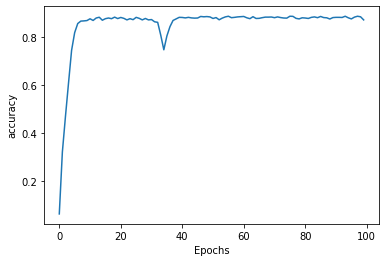

In [30]:
plot_graphs(history, 'accuracy')


In [31]:
seed_text = "Mai yaha hu"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Mai yaha hu hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha hun yaha


In [32]:
seed_text = "do pal ruka"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

do pal ruka khwaabon ruka khwaabon ruka khwaabon raha mar dekha hai ishq vaadi mein oh oh hai oh jisko na shehnaai hai kya hamne dekhiye mein jind ey meri hogi teri peed baankiye naare ni afsana afsana oh oh oh chhupa ve zindagi kis taraf jaa rahi hai aur ye ehsaas hai kyun haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan


In [34]:
seed_text = "ek din"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

ek din jab savere savere savere savere savere savere savere savere savere hi sudhar jaayenge haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan haan


In [35]:
seed_text = "tere liye hum hai jiye"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

tere liye hum hai jiye kis maahol mein ham hain jiye honton ko siye siye siye dinon hai oy oy jind meriye oy heeriye soniye ho ho ho ho ho oh oh oh oh oh mutiyaare ni adiye kanda chuba tere qurbaan java hi des mehmaanon mera ho oh ho ho ho ho oh oh ho ho oh ho ho ho ho oh oh ho ho oh ho ho ho ho oh oh ho ho oh ho ho ho ho oh oh ho ho oh ho ho ho ho oh oh ho ho oh ho ho ho ho oh oh ho ho oh ho ho
